# Benchmarking visualization analogue search test set
The results of running MS2Query, MS2Deepscore and (modified) cosine on the test spectra of all spectra from 250 inchikeys, that do not have an exact library hit is visualized below.
In the file generate_predictions_for_test_data the predictions are generated and stored in the format:
List[Tuple(best_spectrum_id, predicted_score)]

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ms2query.utils import load_pickled_file

# General file locations
data_folder = "C:/Users/jonge094/PycharmProjects/PhD_MS2Query/ms2query/data"
benchmarking_results_folder = os.path.join(data_folder, "libraries_and_models/gnps_15_12_2021/benchmarking")
library_folder = os.path.join(data_folder, "libraries_and_models/gnps_15_12_2021/")

In [2]:
# Load in general files:
tanimoto_scores_file_name = os.path.join(library_folder, "in_between_files/GNPS_15_12_2021_pos_tanimoto_scores.pickle")
sqlite_file_location = os.path.join(library_folder, "library_gnps_15_12/library_GNPS_15_12_2021.sqlite")
test_spectra_3000 = load_pickled_file(os.path.join(library_folder,
                                                   "in_between_files/GNPS_15_12_2021_pos_test_3000_spectra.pickle"))
test_spectra_250 = load_pickled_file(os.path.join(library_folder,
                                                   "in_between_files/GNPS_15_12_2021_pos_test_250_inchikeys.pickle"))

# Load in predictions:
df_results_ms2query = pd.read_csv(os.path.join(benchmarking_results_folder, "GNPS_15_12_2021_pos_test_250_inchikeys.csv"))
results_mod_cosine = load_pickled_file(os.path.join(benchmarking_results_folder, "highest_mod_cosine_mass_tol_100_test_spectra_250.pickle"))
results_ms2deepscore = load_pickled_file(os.path.join(benchmarking_results_folder, "ms2deepscores_within_100_Da_test_spectra_250.pickle"))

# convert to list with tuple format and add spectrum objects
results_ms2query_250 = [(x[0], x[1], test_spectra_250[x[2]-1]) for x in df_results_ms2query[["spectrum_ids", "ms2query_model_prediction", "query_spectrum_nr"]].to_numpy()]
results_mod_cosine_250 = [(results_mod_cosine[i][0], results_mod_cosine[i][1], test_spectra_250[i]) for i in range(len(test_spectra_250))]
results_ms2deepscore_250 = [(results_ms2deepscore[i][0], results_ms2deepscore[i][1], test_spectra_250[i]) for i in range(len(test_spectra_250))]

In [51]:
for spectrum in test_spectra_250:
    print(spectrum.get("spectrumid"))

CCMSLIB00000001598
CCMSLIB00000075075
CCMSLIB00000075076
CCMSLIB00000077204
CCMSLIB00000081305
CCMSLIB00000081306
CCMSLIB00000081307
CCMSLIB00000081354
CCMSLIB00000081748
CCMSLIB00000224037
CCMSLIB00000424763
CCMSLIB00000425007
CCMSLIB00000425008
CCMSLIB00000425009
CCMSLIB00000531512
CCMSLIB00000839210
CCMSLIB00000840552
CCMSLIB00001059086
CCMSLIB00001059677
CCMSLIB00004679179
CCMSLIB00004679189
CCMSLIB00004721860
CCMSLIB00004752862
CCMSLIB00005435440
CCMSLIB00005435441
CCMSLIB00005435939
CCMSLIB00005436050
CCMSLIB00005436059
CCMSLIB00005436063
CCMSLIB00005436150
CCMSLIB00005436488
CCMSLIB00005463461
CCMSLIB00005466082
CCMSLIB00005716519
CCMSLIB00005716848
CCMSLIB00005723560
CCMSLIB00005723561
CCMSLIB00005724292
CCMSLIB00005724542
CCMSLIB00005724543
CCMSLIB00005724544
CCMSLIB00005724545
CCMSLIB00005725149
CCMSLIB00005725150
CCMSLIB00005725151
CCMSLIB00005788041
CCMSLIB00005879244
CCMSLIB00006675749
CCMSLIB00006709920
CCMSLIB00006709950
CCMSLIB00006710027
CCMSLIB00006717989
CCMSLIB00000

In [53]:
for result in results_ms2query_250:
    print(result[0], result[1], result[2].get("inchikey")[:14])

CCMSLIB00005435911 0.7313 VCAGNEUDNVLWPT
CCMSLIB00000075070 0.7171 MRAKKDQIGHDJRU
CCMSLIB00000075069 0.7171 MRAKKDQIGHDJRU
CCMSLIB00006710620 0.5837 XNEFYCZVKIDDMS
CCMSLIB00000852821 0.5727 JFFHVIUZNPTGGR
CCMSLIB00000081300 0.7707 JFFHVIUZNPTGGR
CCMSLIB00003091629 0.6074 JFFHVIUZNPTGGR
CCMSLIB00005716530 0.7171 JFFHVIUZNPTGGR
CCMSLIB00006703326 0.5837 NHMMAMIRMITGRD
CCMSLIB00000224040 0.8777 WRFCJLBPEINJNJ
CCMSLIB00000080498 0.8891 XZKJITYVVLNMNW
CCMSLIB00000577602 0.7567 FNXUKINBHTXZPS
CCMSLIB00005435905 0.7918 FNXUKINBHTXZPS
CCMSLIB00005435909 0.7918 FNXUKINBHTXZPS
CCMSLIB00000852348 0.806 CZFMBNIKGDJPJQ
CCMSLIB00005721129 0.409 CZZVTNRWOQFMEU
CCMSLIB00000840551 0.8487 FHTSKUYELRWGGJ
CCMSLIB00000001621 0.6337 OEZAYKMYHOLRMX
CCMSLIB00006710023 0.7907 YBQOZZHZAJCTLD
CCMSLIB00004679177 0.5327 FDGKQWLSJXEOPF
CCMSLIB00006695193 0.409 OHEGFVQYOWWYOR
CCMSLIB00000855623 0.5547 XNTNCSKBTFROEZ
CCMSLIB00006704760 0.5516 FDGKQWLSJXEOPF
CCMSLIB00000072234 0.7199 SZXDNGVQRDTJSD
CCMSLIB00005721050 

CCMSLIB00000222720 0.7081 IRKFOLIBBQDADK
CCMSLIB00006468876 0.6337 IRKFOLIBBQDADK
CCMSLIB00000215332 0.7081 IRKFOLIBBQDADK
CCMSLIB00006696271 0.409 IRKFOLIBBQDADK
CCMSLIB00006477223 0.6337 IRKFOLIBBQDADK
CCMSLIB00006690044 0.5521 IRKFOLIBBQDADK
CCMSLIB00006473381 0.6074 IRKFOLIBBQDADK
CCMSLIB00006472230 0.6333 IRKFOLIBBQDADK
CCMSLIB00006706979 0.6327 IRKFOLIBBQDADK
CCMSLIB00005723623 0.409 IRKFOLIBBQDADK
CCMSLIB00006704695 0.409 IRKFOLIBBQDADK
CCMSLIB00006709850 0.409 IRKFOLIBBQDADK
CCMSLIB00006581984 0.4887 IRKFOLIBBQDADK
CCMSLIB00000210666 0.7075 IRKFOLIBBQDADK
CCMSLIB00000220365 0.7105 IRKFOLIBBQDADK
CCMSLIB00006471699 0.6074 IRKFOLIBBQDADK
CCMSLIB00005743982 0.6074 IRKFOLIBBQDADK
CCMSLIB00006539805 0.552 IRKFOLIBBQDADK
CCMSLIB00006433993 0.409 IRKFOLIBBQDADK
CCMSLIB00005719844 0.409 IRKFOLIBBQDADK
CCMSLIB00005723462 0.3459 IRKFOLIBBQDADK
CCMSLIB00006707293 0.4887 IRKFOLIBBQDADK
CCMSLIB00006481010 0.6337 IRKFOLIBBQDADK
CCMSLIB00006501536 0.5981 WAZQKBSNIFTXNV
CCMSLIB00006698845 0.57

In [59]:
for result in results_mod_cosine_250:
    print(result[0], result[1], result[2], result[3].get("inchikey")[:14])

CCMSLIB00006519742 0.8031004430582596 0.23049645390070922 VCAGNEUDNVLWPT
CCMSLIB00000075069 0.7561739042769187 1.0 MRAKKDQIGHDJRU
CCMSLIB00005436027 0.42508083703891647 1.0 MRAKKDQIGHDJRU
CCMSLIB00006687375 0.9618715349665482 0.2845953002610966 XNEFYCZVKIDDMS
CCMSLIB00005884120 0.9376291517643831 0.11436950146627566 JFFHVIUZNPTGGR
CCMSLIB00006392866 0.9836625284640151 0.1564245810055866 JFFHVIUZNPTGGR
CCMSLIB00006463570 0.987981127606447 0.2099827882960413 JFFHVIUZNPTGGR
CCMSLIB00000078861 0.9183385956777088 0.4857928505957837 JFFHVIUZNPTGGR
CCMSLIB00006404884 0.9637359523786524 0.6428571428571429 NHMMAMIRMITGRD
CCMSLIB00000224035 0.9828002011108998 0.6413043478260869 WRFCJLBPEINJNJ
CCMSLIB00000424758 0.9238899462583071 0.9857685009487666 XZKJITYVVLNMNW
CCMSLIB00006389514 0.42211453476028493 0.6067532467532467 FNXUKINBHTXZPS
CCMSLIB00006550298 0.415429167498387 0.49440715883668906 FNXUKINBHTXZPS
CCMSLIB00000425010 0.5261503281833584 1.0 FNXUKINBHTXZPS
CCMSLIB00000840548 0.8806740360389

CCMSLIB00006395170 0.9259901039327021 0.2184331797235023 DBMJZOMNXBSRED
CCMSLIB00006366194 0.9901687822190298 0.625 DBMJZOMNXBSRED
CCMSLIB00006354511 0.8925069669444868 0.11927877947295423 DBMJZOMNXBSRED
CCMSLIB00006366194 0.9864974323885941 0.625 DBMJZOMNXBSRED
CCMSLIB00005722720 0.9794997555221845 0.7866473149492017 DBMJZOMNXBSRED
CCMSLIB00006430351 0.6871190281081416 0.3441108545034642 DBMJZOMNXBSRED
CCMSLIB00006421193 0.9130809724459329 0.7866473149492017 DBMJZOMNXBSRED
CCMSLIB00006395372 0.7677720305891693 0.4793070259865255 DBMJZOMNXBSRED
CCMSLIB00005764768 0.9938265345238062 0.15151515151515152 DBMJZOMNXBSRED
CCMSLIB00006481190 0.8941948470118978 0.26703210649960846 DBMJZOMNXBSRED
CCMSLIB00004710801 0.924239165967116 0.3796829971181556 DBMJZOMNXBSRED
CCMSLIB00005773846 0.8353850127277733 0.24662668665667167 DBMJZOMNXBSRED
CCMSLIB00006442471 0.9732200014541468 0.296411856474259 IRKFOLIBBQDADK
CCMSLIB00006413220 0.9662117518083866 0.2222222222222222 IRKFOLIBBQDADK
CCMSLIB000064421

CCMSLIB00006579801 0.9730716622218546 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579745 0.7506768791137857 0.5339153794492948 MGJLSBDCWOSMHL
CCMSLIB00006579801 0.9628472800060419 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579745 0.8432105730471184 0.5339153794492948 MGJLSBDCWOSMHL
CCMSLIB00006579779 0.9800403735596981 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579802 0.9175717343864781 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579833 0.970507131083783 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579834 0.9496770506868705 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579885 0.9690583419974242 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579868 0.9133452374459436 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579833 0.9574875993656095 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579868 0.9162790886194014 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579885 0.9698752954051973 0.48843728100911005 MGJLSBDCWOSMHL
CCMSLIB00006579886 0.9019020037945363 0.48843728100911

## Add tanimoto score
The tanimoto score is added to each tuple as ground thruth. 

In [3]:
from ms2query.query_from_sqlite_database import get_metadata_from_sqlite
from tqdm.notebook import tqdm
 

def select_best_match_and_calculate_tanimoto_score(tanimoto_scores_file, best_matches, sqlite_file_location):
    """Returns a list with a tuple(best_match_spectrum_id, best_match_score, tanimoto_score)
    
    best_matches:
        List with tuples, first value is the highest scoring spectum_id and second value is the score (e.g. ms2ds, cos, or ms2query), third value are the test spectra
    """
    best_match_and_tanimoto = []
    tanimoto_scores = load_pickled_file(tanimoto_scores_file)
    for best_match_spectrum_id, predicted_score, test_spectrum in tqdm(best_matches):
        test_spectrum_inchikey = test_spectrum.get("inchikey")[:14]
        best_match_inchikey = get_metadata_from_sqlite(sqlite_file_location, [best_match_spectrum_id], "spectrumid")[best_match_spectrum_id]["inchikey"][:14]
        tanimoto_score = tanimoto_scores.loc[best_match_inchikey, test_spectrum_inchikey]
        
        best_match_and_tanimoto.append((best_match_spectrum_id, predicted_score, tanimoto_score, test_spectrum))
    return best_match_and_tanimoto

In [4]:
results_ms2query_250 = select_best_match_and_calculate_tanimoto_score(tanimoto_scores_file_name, results_ms2query_250, sqlite_file_location)
results_mod_cosine_250 = select_best_match_and_calculate_tanimoto_score(tanimoto_scores_file_name, results_mod_cosine_250, sqlite_file_location)
results_ms2deepscore_250 = select_best_match_and_calculate_tanimoto_score(tanimoto_scores_file_name, results_ms2deepscore_250, sqlite_file_location)

  0%|          | 0/2984 [00:00<?, ?it/s]

  0%|          | 0/2987 [00:00<?, ?it/s]

  0%|          | 0/2987 [00:00<?, ?it/s]

# Visualize results

In [144]:
def select_threshold_for_recall(predictions, recall, nr_of_spectra):
    threshold = 0
    step = 0.0001
    stop = False
    while not stop:
        found_recall = len([scores[2] for scores in predictions if scores[1] > threshold])/nr_of_spectra
        if found_recall > recall:
            threshold += step
        else:
            stop = True
    return threshold, found_recall

def compare_tanimoto_score_distribution(ms2query_scores, ms2ds_scores, mod_cos_scores, recall, nr_of_spectra):
    threshold_ms2q, found_recall_ms2q = select_threshold_for_recall(ms2query_scores, recall, nr_of_spectra)
    threshold_ms2ds, found_recall_ms2ds = select_threshold_for_recall(ms2ds_scores, recall, nr_of_spectra)
    threshold_mod_cos, found_recall_mod_cos = select_threshold_for_recall(mod_cos_scores, recall, nr_of_spectra)
    print(f"MS2Query Threshold:{threshold_ms2q:.4f} Recall:{found_recall_ms2q:.3f}")
    print(f"MS2Deepscore Threshold:{threshold_ms2ds:.4f} Recall:{found_recall_ms2ds:.3f}")
    print(f"Modified cosine Threshold:{threshold_mod_cos:.4f} Recall:{found_recall_mod_cos:.3f}")
    
    weight_to_convert_to_percentage = 100/nr_of_spectra
    bins = np.linspace(0, 1, 11)

    selected_scores_ms2q = [scores[2] for scores in ms2query_scores if scores[1] > threshold_ms2q]
    weights_ms2q = [weight_to_convert_to_percentage] * len(selected_scores_ms2q)
    
    selected_scores_ms2ds = [scores[2] for scores in ms2ds_scores if scores[1] > threshold_ms2ds]
    weights_ms2ds = [weight_to_convert_to_percentage] * len(selected_scores_ms2ds)
    
    selected_scores_mod_cos = [scores[2] for scores in mod_cos_scores if scores[1] > threshold_mod_cos]
    weights_mod_cos = [weight_to_convert_to_percentage] * len(selected_scores_mod_cos)

    plt.hist([selected_scores_ms2q, selected_scores_ms2ds, selected_scores_mod_cos], bins, 
             label = ["MS2Query", "MS2Deepscore", "Mod_cos"], weights = [weights_ms2q, weights_ms2ds, weights_mod_cos])
    
    plt.legend(loc = "upper center", title = "Select on:")
    plt.xlabel("tanimoto_score")
    plt.ylabel("Percentage of matches (%)")
#     plt.ylim(0, 11)

    plt.show


MS2Query Threshold:0.0000 Recall:0.999
MS2Deepscore Threshold:0.0000 Recall:1.000
Modified cosine Threshold:0.0000 Recall:1.000


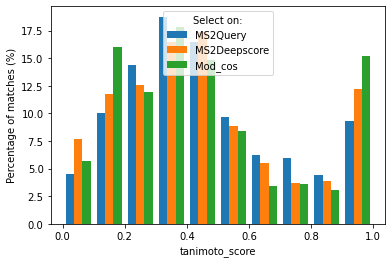

In [145]:
compare_tanimoto_score_distribution(results_ms2query_250, results_ms2deepscore_250, results_mod_cosine_250, 1, len(test_spectra_250)) # 50%

MS2Query Threshold:0.6330 Recall:0.349
MS2Deepscore Threshold:0.9664 Recall:0.348
Modified cosine Threshold:0.9883 Recall:0.350


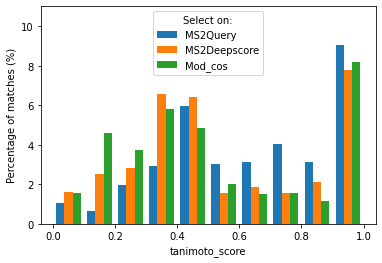

In [118]:
compare_tanimoto_score_distribution(results_ms2query_250, results_ms2deepscore_250, results_mod_cosine_250, 0.35, len(test_spectra_250)) # 50%

MS2Query Threshold:0.5838 Recall:0.599
MS2Deepscore Threshold:0.9305 Recall:0.600
Modified cosine Threshold:0.9396 Recall:0.600


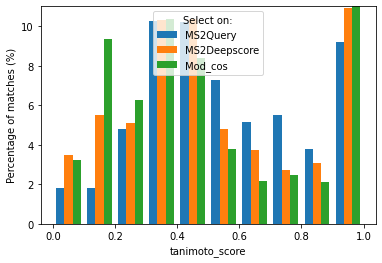

In [119]:
compare_tanimoto_score_distribution(results_ms2query_250, results_ms2deepscore_250, results_mod_cosine_250, 0.6, len(test_spectra_250))

MS2Query Threshold:0.7881 Recall:0.200
MS2Deepscore Threshold:0.9835 Recall:0.200
Modified cosine Threshold:0.9979 Recall:0.198


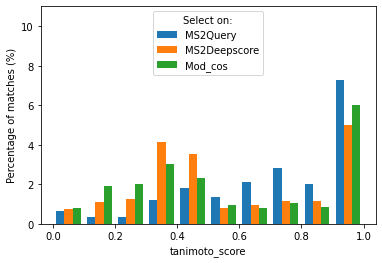

In [120]:
compare_tanimoto_score_distribution(results_ms2query_250, results_ms2deepscore_250, results_mod_cosine_250, 0.2, len(test_spectra_250))

In [103]:
def avg_tanimoto_vs_percentage_found(selection_criteria_and_tanimoto, cut_off_maximum, steps, legend_label):
    cut_offs = {}
    percentages_found = []
    average_tanimoto_score = []
    for i in range(steps):
        cut_off = cut_off_maximum/steps * i
        selected_scores = [scores[2] for scores in selection_criteria_and_tanimoto if scores[1] > cut_off]
        percentages_found.append(len(selected_scores)/len(selection_criteria_and_tanimoto)*100)
        average_tanimoto_score.append(sum(selected_scores)/len(selected_scores))
    plt.plot(percentages_found, average_tanimoto_score, label = legend_label)
    plt.xlim(100,10)
    plt.ylim(0, 1)
    plt.xlabel("Recall (%)")
    plt.ylabel("Average tanimoto score")
    plt.legend(loc = "lower right", title = "Select on highest:")
    plt.show

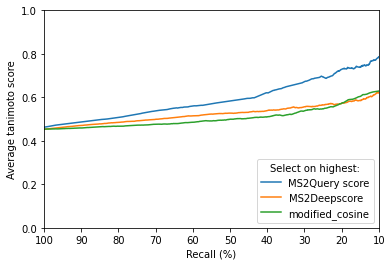

In [104]:
avg_tanimoto_vs_percentage_found(results_ms2query_250, 0.945, 10000, "MS2Query score")
avg_tanimoto_vs_percentage_found(results_ms2deepscore_250, 1, 10000, "MS2Deepscore")
avg_tanimoto_vs_percentage_found(results_mod_cosine_250, 1, 10000, "modified_cosine")

# Performance based on mass range

Threshold:0.9832 Recall:0.399


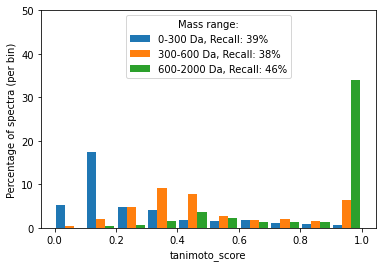

In [136]:
from matplotlib import pyplot as plt
import numpy as np

def plot_tanimoto_score_distr_masses(scores_and_tanimoto, recall, mass_bins, nr_of_spectra):
    cut_off_ms2q, found_recall_ms2q = select_threshold_for_recall(scores_and_tanimoto, recall, nr_of_spectra)
    print(f"Threshold:{cut_off_ms2q:.4f} Recall:{found_recall_ms2q:.3f}")

    bins = np.linspace(0, 1, 11)
    ms2q_scores_list = []
    label_list = []
    weight_list = []
    for i in range(len(mass_bins)-1):
        min_mass = mass_bins[i]
        max_mass = mass_bins[i+1]
        
        ms2query_and_tanimoto_mass_range = [scores for scores in scores_and_tanimoto if scores[3].get("parent_mass") > min_mass and scores[3].get("parent_mass") < max_mass]

        # Select scores for ms2query
        selected_scores_ms2q = [scores[2] for scores in ms2query_and_tanimoto_mass_range if scores[1] > cut_off_ms2q]
        ms2q_percentage_selected = len(selected_scores_ms2q)/len(ms2query_and_tanimoto_mass_range)*100
#         print("mass range ",min_mass, "-", max_mass)
#         print(len(ms2query_and_tanimoto_mass_range))
#         print(ms2q_percentage_selected)
        weight_to_convert_to_percentage = 100/len(ms2query_and_tanimoto_mass_range)
        weights_ms2q = [weight_to_convert_to_percentage] * len(selected_scores_ms2q)
        ms2q_scores_list.append(selected_scores_ms2q)
        label_list.append(str(min_mass) + "-" + str(max_mass) + " Da, Recall: " + str(int(ms2q_percentage_selected)) + "%")
        weight_list.append(weights_ms2q)
#     print(ms2q_scores_list)
#     print(label_list)
    
    
    plt.hist(ms2q_scores_list, bins, label = label_list, weights = weight_list, stacked=False, rwidth = 0.9)

    plt.legend(loc = "upper center", title = "Mass range:")

    plt.xlabel("tanimoto_score")
    plt.ylabel("Percentage of spectra (per bin)")
    plt.ylim(0, 50)

    plt.show
plot_tanimoto_score_distr_masses(results_mod_cosine_250, 0.4, [0,300, 600, 2000], len(test_spectra_250))

Threshold:0.9601 Recall:0.399


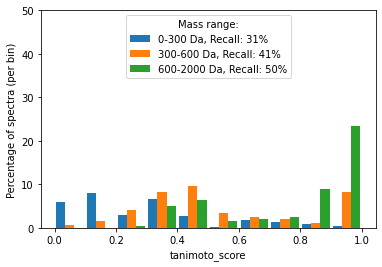

In [138]:
plot_tanimoto_score_distr_masses(results_ms2deepscore_250, 0.4, [0,300, 600, 2000], len(test_spectra_250))

Threshold:0.6677 Recall:0.300


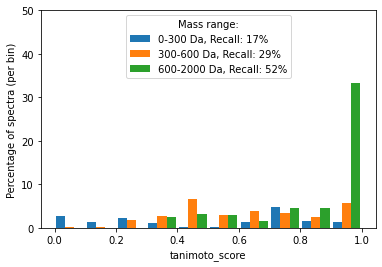

In [142]:
plot_tanimoto_score_distr_masses(results_ms2query_250, 0.3, [0,300, 600, 2000], len(test_spectra_250))

# Best Tanimoto score

0.9178629677841729


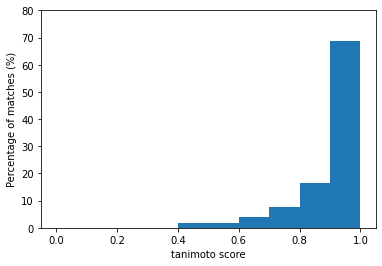

In [94]:
def plot_best_tanimoto_score_distribution(spectra, tanimoto_scores):
    inchikeys = [spectrum.get("inchikey")[:14] for spectrum in spectra]
    unique_inchikeys = list(set(inchikeys))
    
    # remove unique inchikeys from rows
    tanimoto_scores_removed = tanimoto_scores[~tanimoto_scores.index.isin(unique_inchikeys)]
    highest_tanimoto_list = []
    for inchikey in inchikeys:
        highest_tanimoto_score = tanimoto_scores_removed[inchikey].max()
        highest_tanimoto_list.append(highest_tanimoto_score)
    
    weight_to_convert_to_percentage = 100/len(spectra)
    weights = [weight_to_convert_to_percentage] * len(highest_tanimoto_list)
    
    average_tanimoto = sum(highest_tanimoto_list)/len(inchikeys)
    print(average_tanimoto)
    plt.xlabel("tanimoto score")
    plt.ylabel("Percentage of matches (%)")
    plt.ylim(0,80)
    
    plt.hist(highest_tanimoto_list, weights = weights, bins = np.linspace(0, 1, 11))
    plt.show()
plot_best_tanimoto_score_distribution(test_spectra_250, load_pickled_file(tanimoto_scores_file_name))

  0%|          | 0/250 [00:00<?, ?it/s]

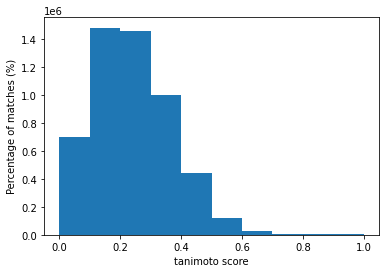

In [146]:
def plot_average_tanimoto_distribution(spectra, tanimoto_scores):
    bins = np.linspace(0, 1, 11)

    inchikeys = [spectrum.get("inchikey")[:14] for spectrum in spectra]
    unique_inchikeys = list(set(inchikeys))
    
    all_inchikeys = []
    for row in tqdm(unique_inchikeys):
        all_inchikeys += list(tanimoto_scores[row])
        
    weight_to_convert_to_percentage = 100/len(all_inchikeys)
    
    matches = []
    
#     weights = [weight_to_convert_to_percentage] * len(all_inchikeys)
    plt.xlabel("tanimoto score")
    plt.ylabel("Percentage of matches (%)")
    plt.hist(all_inchikeys, bins = bins)
#     plt.ylim(0,80)

    plt.show()
plot_average_tanimoto_distribution(test_spectra_250, load_pickled_file(tanimoto_scores_file_name))

# Additional functions for plotting

In [ ]:
def plot_tanimoto_score_distribution_for_cutoff(scores_and_tanimoto, cut_offs, legend_title, nr_of_spectra):
    """Plots the tanimoto score distribution for all hits above a threshold.
    
    scores_and_tanimoto:
    list with tuples containing (best_match_spectrum_id, predicted_score, tanimoto_score, test_spectrum)
    """
    bins = np.linspace(0, 1, 11)

    weight_to_convert_to_percentage = 100/nr_of_spectra

    for cut_off in cut_offs:
        selected_scores = [scores[2] for scores in scores_and_tanimoto if scores[1] > cut_off]
        print("percentage selected = " + str(len(selected_scores)/nr_of_spectra*100))
        weights = [weight_to_convert_to_percentage] * len(selected_scores)
        
        plt.hist(selected_scores, bins, label = f"{cut_off:.2f}", weights = weights, histtype = "step")
    
    plt.legend(loc = "upper center", title = legend_title, ncol = 3)
    plt.xlabel("tanimoto_score")
    plt.ylabel("Percentage of matches (%)")
    plt.ylim(0, 25)

    plt.show